In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, median_absolute_error

from tpot import TPOTRegressor

from pycaret.regression import *

/Users/andreas.maier/.local/share/virtualenvs/shellhackathon-J-_FuwKv/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [48]:
df = pd.read_csv("../data/raw/Demand_History.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   demand_point_index  4096 non-null   int64  
 1   x_coordinate        4096 non-null   float64
 2   y_coordinate        4096 non-null   float64
 3   2010                4096 non-null   float64
 4   2011                4096 non-null   float64
 5   2012                4096 non-null   float64
 6   2013                4096 non-null   float64
 7   2014                4096 non-null   float64
 8   2015                4096 non-null   float64
 9   2016                4096 non-null   float64
 10  2017                4096 non-null   float64
 11  2018                4096 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 384.1 KB


In [4]:
X = df.drop("2018", axis=1)

In [5]:
y = df["2018"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

In [7]:
reg = LinearRegression().fit(X_train, y_train)

In [8]:
y_pred = reg.predict(X_test)

In [9]:
print(r2_score(y_test, y_pred))

0.9856454627807976


In [10]:
# To compute the MAPE, we need to make sure we have no zero values in test and prediction

# convert y_test series to a dataframe
df_compare = y_test.to_frame()
# add y_pred numpy array as a new column to the dataframe
df_compare["2018_pred"] = y_pred.tolist()
# see https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df_compare_no_zeros = df_compare.loc[(df_compare!=0).all(axis=1)]

In [11]:
print(mean_absolute_percentage_error(df_compare_no_zeros["2018"], df_compare_no_zeros["2018_pred"]))

0.3028254141383469


With 30% MAPE we have reached an OK value, see https://stephenallwright.com/good-mape-score/

# Random Forest Regression

In [12]:
reg = RandomForestRegressor().fit(X_train, y_train)

In [13]:
y_pred = reg.predict(X_test)

In [14]:
print(r2_score(y_test, y_pred))

0.9899051283937154


In [15]:
# To compute the MAPE, we need to make sure we have no zero values in test and prediction

# convert y_test series to a dataframe
df_compare = y_test.to_frame()
# add y_pred numpy array as a new column to the dataframe
df_compare["2018_pred"] = y_pred.tolist()
# see https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df_compare_no_zeros = df_compare.loc[(df_compare!=0).all(axis=1)]

In [16]:
print(mean_absolute_percentage_error(df_compare_no_zeros["2018"], df_compare_no_zeros["2018_pred"]))

0.06189141043673061


With 6% MAPE we have reached an Very Good value, see https://stephenallwright.com/good-mape-score/

# Gradient Boosting Regression

In [17]:
reg = GradientBoostingRegressor().fit(X_train, y_train)

In [18]:
y_pred = reg.predict(X_test)

In [19]:
print(r2_score(y_test, y_pred))

0.9902019715135589


The R2 score is best for gradient boosting

In [20]:
# To compute the MAPE, we need to make sure we have no zero values in test and prediction

# convert y_test series to a dataframe
df_compare = y_test.to_frame()
# add y_pred numpy array as a new column to the dataframe
df_compare["2018_pred"] = y_pred.tolist()
# see https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df_compare_no_zeros = df_compare.loc[(df_compare!=0).all(axis=1)]

In [21]:
print(mean_absolute_percentage_error(df_compare_no_zeros["2018"], df_compare_no_zeros["2018_pred"]))

0.07983836741220454


With 8% MAPE we have reached an Very good value, see https://stephenallwright.com/good-mape-score/

# TPOT

In [22]:
# tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))

# ExtraTrees Regression

In [23]:
reg = ExtraTreesRegressor().fit(X_train, y_train)

In [24]:
y_pred = reg.predict(X_test)

In [25]:
print(r2_score(y_test, y_pred))

0.9902206307532835


The R2 score is slightly better for extra trees than for gradient boosting.

In [26]:
# To compute the MAPE, we need to make sure we have no zero values in test and prediction

# convert y_test series to a dataframe
df_compare = y_test.to_frame()
# add y_pred numpy array as a new column to the dataframe
df_compare["2018_pred"] = y_pred.tolist()
# see https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df_compare_no_zeros = df_compare.loc[(df_compare!=0).all(axis=1)]

In [27]:
print(mean_absolute_percentage_error(df_compare_no_zeros["2018"], df_compare_no_zeros["2018_pred"]))

0.05949952862616049


With < 6% MAPE we have reached an Very good value, see https://stephenallwright.com/good-mape-score/.

# pyCaret

In [28]:
experiment = setup(data = df, target = '2018', session_id=123)

,Description,Value
0,Session id,123
1,Target,2018
2,Target type,Regression
3,Data shape,"(4096, 12)"
4,Train data shape,"(2867, 12)"
5,Test data shape,"(1229, 12)"
6,Numeric features,11
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [29]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.9244,65.4110,8.0651,0.9897,0.0716,0.0602,0.0590
rf,Random Forest Regressor,4.9421,66.9125,8.1520,0.9895,0.0732,0.0616,0.1140
gbr,Gradient Boosting Regressor,5.0780,67.6602,8.1943,0.9894,0.1117,0.0858,0.0660
lightgbm,Light Gradient Boosting Machine,5.0981,70.6223,8.3714,0.9889,0.0941,0.0706,0.0140
xgboost,Extreme Gradient Boosting,5.2978,78.0769,8.8079,0.9877,0.0829,0.0682,0.0490
ridge,Ridge Regression,6.7866,92.0085,9.5744,0.9855,0.3339,0.3364,0.0040
lar,Least Angle Regression,6.7857,92.0093,9.5744,0.9855,0.3338,0.3362,0.0040
br,Bayesian Ridge,6.7988,92.0269,9.5752,0.9855,0.3355,0.3387,0.0040
lr,Linear Regression,6.7857,92.0093,9.5744,0.9855,0.3338,0.3362,0.1620
en,Elastic Net,7.3052,99.2222,9.9395,0.9843,0.3748,0.4000,0.0080


pyCaret also confirms that ExtraTreeRegression seems to deviler the best performance for this dataset.

In [30]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.5082,61.8598,7.8651,0.9896,0.0725,0.0623
1,4.6697,61.5910,7.8480,0.9898,0.0697,0.0560
2,5.1633,71.4715,8.4541,0.9887,0.0697,0.0583
3,4.8489,67.5730,8.2203,0.9897,0.0729,0.0628
4,4.9338,55.6284,7.4584,0.9906,0.0723,0.0612
5,5.1640,71.2992,8.4439,0.9891,0.0713,0.0594
6,5.5804,86.5890,9.3053,0.9874,0.0724,0.0584
7,4.3657,50.4883,7.1055,0.9917,0.0723,0.0603
8,5.5135,70.9671,8.4242,0.9897,0.0739,0.0619


In [31]:
tuned_et = tune_model(et, optimize = 'MAPE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.6816,59.8774,7.7380,0.9899,0.0981,0.0835
1,4.7727,65.1033,8.0687,0.9893,0.0738,0.0630
2,5.6777,82.6494,9.0912,0.9869,0.0861,0.0705
3,5.2956,82.4689,9.0812,0.9875,0.0847,0.0725
4,5.0592,58.8067,7.6686,0.9901,0.0880,0.0674
5,5.4543,83.1811,9.1204,0.9873,0.0762,0.0646
6,5.9653,98.3517,9.9172,0.9857,0.0860,0.0689
7,4.9106,62.0593,7.8778,0.9898,0.0849,0.0713
8,5.7391,76.2650,8.7330,0.9889,0.0777,0.0652


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Interestingly tuning the model doesn't seem to improve performance.

# Creating predictions for 2019 and 2020

In [33]:
reg = ExtraTreesRegressor().fit(X_train, y_train)

In [49]:
df_pred = df.copy()
df_pred["2019"] = reg.predict(df.drop("2010", axis=1))

In [51]:
df_pred["2020"] = reg.predict(df_pred.drop(["2010","2011"], axis=1))

In [53]:
df_pred.to_csv("../data/processed/Demand_Future.csv")

<AxesSubplot: >

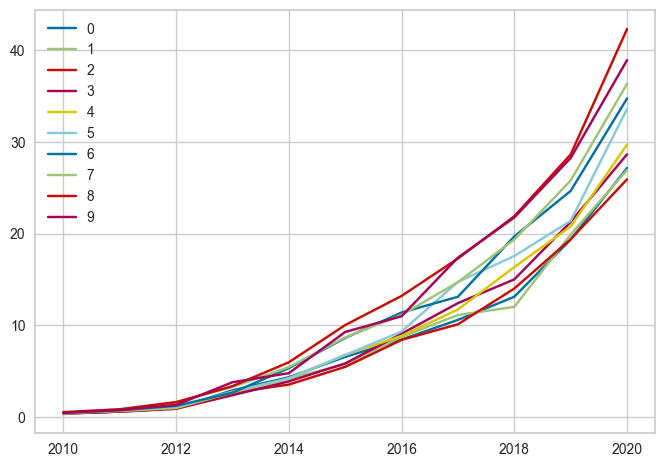

In [79]:
df_pred.drop(["x_coordinate","y_coordinate", "demand_point_index"], axis=1).iloc[0:10].T.plot()